# 3 Degrees Of Freedome (DOF)

In [1]:
%matplotlib inline
import sympy as sym
import sympy.physics.mechanics as me
from sympy import Abs,sin,cos,tan

from sympy import init_printing
init_printing(use_latex='mathjax')

from pydy.system import System
import numpy as np
import matplotlib.pyplot as plt


<img src="3dof.png" width="400" align="left">

In [2]:
x0,y0,psi,x,y,beta,x,y,u,v,r,V = me.dynamicsymbols(r'x0 y0 \psi x y \beta x y u v r V')
m,Izz,t,x_cg = sym.symbols(r'm Izz t x_{cg}')

In [3]:
earth_frame = me.ReferenceFrame(name = 'E')
ship_frame = me.ReferenceFrame(name = 'S')
ship_frame.orient(parent = earth_frame,rot_type='Axis',amounts = (psi,earth_frame.z))
#ship_frame.set_ang_vel(otherframe=earth_frame,value = r*earth_frame.z)

In [4]:
ship_frame.dcm(otherframe=earth_frame)

⎡cos(\psi(t))   sin(\psi(t))  0⎤
⎢                              ⎥
⎢-sin(\psi(t))  cos(\psi(t))  0⎥
⎢                              ⎥
⎣      0             0        1⎦

In [5]:
O0 = me.Point('O0')
O0.set_vel(frame = earth_frame,value = 0)

O = me.Point('O')
#O.set_pos(otherpoint=O0,value = x0*earth_frame.x + y0*earth_frame.y)
O.set_pos(otherpoint=O0,value = x*ship_frame.x + y*ship_frame.y)

O.set_vel(frame = ship_frame,value = u*ship_frame.x + v*ship_frame.y)

O.v1pt_theory(otherpoint=O0,outframe=earth_frame,interframe=ship_frame)

⎛            d          ⎞       ⎛            d          ⎞
⎜u(t) - y(t)⋅──(\psi(t))⎟ s_x + ⎜v(t) + x(t)⋅──(\psi(t))⎟ s_y
⎝            dt         ⎠       ⎝            dt         ⎠

In [6]:
O.pos_from(O0)

x(t) s_x + y(t) s_y

In [7]:
O.vel(earth_frame).express(earth_frame)

⎛⎛            d          ⎞                ⎛            d          ⎞
⎜⎜u(t) - y(t)⋅──(\psi(t))⎟⋅cos(\psi(t)) - ⎜v(t) + x(t)⋅──(\psi(t))⎟⋅sin(\psi(t
⎝⎝            dt         ⎠                ⎝            dt         ⎠

  ⎞       ⎛⎛            d          ⎞                ⎛            d          ⎞
))⎟ e_x + ⎜⎜u(t) - y(t)⋅──(\psi(t))⎟⋅sin(\psi(t)) + ⎜v(t) + x(t)⋅──(\psi(t))⎟⋅
  ⎠       ⎝⎝            dt         ⎠                ⎝            dt         ⎠

            ⎞
cos(\psi(t))⎟ e_y
            ⎠

In [8]:
O.acc(earth_frame).express(earth_frame)

⎛  ⎛                                               2
⎜  ⎜⎛            d          ⎞ d                   d             d           d
⎜- ⎜⎜u(t) - y(t)⋅──(\psi(t))⎟⋅──(\psi(t)) + x(t)⋅───(\psi(t)) + ──(\psi(t))⋅──
⎜  ⎜⎝            dt         ⎠ dt                   2            dt          dt
⎝  ⎝                                             dt

                 ⎞                ⎛
         d       ⎟                ⎜  ⎛            d          ⎞ d
(x(t)) + ──(v(t))⎟⋅sin(\psi(t)) + ⎜- ⎜v(t) + x(t)⋅──(\psi(t))⎟⋅──(\psi(t)) - y
         dt      ⎟                ⎜  ⎝            dt         ⎠ dt
                 ⎠                ⎝

      2                                           ⎞             ⎞       ⎛⎛
     d             d           d          d       ⎟             ⎟       ⎜⎜⎛
(t)⋅───(\psi(t)) - ──(\psi(t))⋅──(y(t)) + ──(u(t))⎟⋅cos(\psi(t))⎟ e_x + ⎜⎜⎜u(t
      2            dt          dt         dt      ⎟             ⎟       ⎜⎜⎝
    dt                                            ⎠             ⎠    

In [9]:
CG = me.Point('CG')
CG.set_pos(O,value = x_cg*ship_frame.x)
CG.v2pt_theory(otherpoint=O,outframe=earth_frame,fixedframe=ship_frame)

CG.acc(earth_frame).express(earth_frame)

⎛⎛                                                                      2
⎜⎜  ⎛       d                         d          ⎞ d                   d
⎜⎜- ⎜x_{cg}⋅──(\psi(t)) + v(t) + x(t)⋅──(\psi(t))⎟⋅──(\psi(t)) - y(t)⋅───(\psi
⎜⎜  ⎝       dt                        dt         ⎠ dt                   2
⎝⎝                                                                    dt

                                      ⎞                ⎛         2
       d           d          d       ⎟                ⎜        d
(t)) - ──(\psi(t))⋅──(y(t)) + ──(u(t))⎟⋅cos(\psi(t)) - ⎜x_{cg}⋅───(\psi(t)) +
       dt          dt         dt      ⎟                ⎜         2
                                      ⎠                ⎝       dt

                                               2
⎛            d          ⎞ d                   d             d           d
⎜u(t) - y(t)⋅──(\psi(t))⎟⋅──(\psi(t)) + x(t)⋅───(\psi(t)) + ──(\psi(t))⋅──(x(t
⎝            dt         ⎠ dt                   2            dt          dt
    

In [10]:
kinematical_differential_equations = [u - x.diff(),
                                      v - y.diff(),
                                      r - psi.diff()]
coordinates = [x,y,psi,]
speeds = [u,v,r,]

In [11]:
kane = me.KanesMethod(earth_frame,coordinates, speeds,kinematical_differential_equations)

## Manoeuver derivatives

In [12]:
delta_R = sym.symbols('\delta_{R}')
eta = sym.symbols('\eta')

Xvv = sym.symbols('X_{vv}')
Xvr = sym.symbols('X_{vr}')
Xvveta = sym.symbols('X_{vv\eta}')
Xdd = sym.symbols('X_{\delta\delta}')
Xddetaeta = sym.symbols('X_{\delta\delta\eta\eta}')

# X
Xudot = sym.symbols('X_{\dot{u}}')
a_i = sym.symbols('a_{i}')
b_i = sym.symbols('b_{i}')
c_i = sym.symbols('c_{i}')
a1 = sym.symbols('a_{1}')

b1 = sym.symbols('b_{1}')
c1 = sym.symbols('c_{1}')
a2 = sym.symbols('a_{2}')
b2 = sym.symbols('b_{2}')
c2 = sym.symbols('c_{2}')
a3 = sym.symbols('a_{3}')
b3 = sym.symbols('b_{3}')
c3 = sym.symbols('c_{3}')
a4 = sym.symbols('a_{4}')
b4 = sym.symbols('b_{4}')
c4 = sym.symbols('c_{4}')

Xrr = sym.symbols('X_{rr}')
Xvv = sym.symbols('X_{vv}')
Xvr = sym.symbols('X_{vr}')
Xvveta = sym.symbols('X_{vv\eta}')
Xdeltadelta = sym.symbols('X_{\delta\delta}')
Xddetaeta = sym.symbols('X_{\delta\delta\eta\eta}')

# Y
Yvdot = sym.symbols('Y_{\dot{v}}')
Yrdot = sym.symbols('Y_{\dot{r}}')

Yv = sym.symbols('Y_{v}')
Yr = sym.symbols('Y_{r}')
Yvav = sym.symbols('Y_{v\abs{v}}')
Yvar = sym.symbols('Y_{v\abs{r}}')

Yveta = sym.symbols('Y_{v\eta}')
Yreta = sym.symbols('Y_{r\eta}')
Yvaveta = sym.symbols('Y_{v\abs{v}\eta}')

Ystar = sym.symbols('Y_{*}')
Ystareta = sym.symbols('Y_{*\eta}')

Ydelta = sym.symbols('Y_{\delta}')
Ydeltaar = sym.symbols('Y_{\delta\abs{r}}')
Ydeltaeta = sym.symbols('Y_{\delta\eta}')

# N
Nrdot = sym.symbols('N_{\dot{r}}')
Nvdot = sym.symbols('N_{\dot{v}}')

Nr = sym.symbols('N_{r}')
Nv = sym.symbols('N_{v}')
Nrar = sym.symbols('N_{r\abs{r}}')
Nvav = sym.symbols('N_{v\abs{v}}')
Nvar = sym.symbols('N_{v\abs{r}}')

Nreta = sym.symbols('N_{r\eta}')
Nveta = sym.symbols('N_{v\eta}')
Nvaveta = sym.symbols('N_{v\abs{v}\eta}')

Ndelta = sym.symbols('N_{\delta}')
Ndeltaar = sym.symbols('N_{\delta\abs{r}}')
Ndeltaeta = sym.symbols('N_{\delta\eta}')

Nstar = sym.symbols('N_{*}')
Nstareta = sym.symbols('N_{*\eta}')



## Fx

In [13]:
equation_Fx = (
#Xudot*u.diff() 
#+ (a_i + b_i*eta + c_i*eta**2)
+ (a1 + b1*eta + c1*eta**2)

+ Xrr*r**2 + Xvv*v**2 + Xvr*v*r
+ Xvveta*v**2*(eta-1)
+ Xdeltadelta*delta_R**2
+ Xddetaeta*(delta_R**2*eta**2)   
)    

a_i = a1  # Assume this now ...
b_i = b1
c_i = c1

 
equation_Fx

                                   2     2                              2     
X_{\delta\delta\eta\eta}⋅\delta_{R} ⋅\eta  + X_{\delta\delta}⋅\delta_{R}  + X_

      2                                                2              2       
{rr}⋅r (t) + X_{vr}⋅r(t)⋅v(t) + X_{vv\eta}⋅(\eta - 1)⋅v (t) + X_{vv}⋅v (t) + \

   2                           
eta ⋅c_{1} + \eta⋅b_{1} + a_{1}

## Fy

In [14]:
equation_Fy = (
#Yvdot*v.diff()
#+ Yrdot*r.diff()
+ Yv*v + Yr*r + Yvav*v*Abs(v) + Yvar*v*Abs(r)
+ (Yveta*v + Yreta*r + Yvaveta*v*Abs(v))*(eta - 1)
+ Ydelta*delta_R + Ydeltaar*delta_R*Abs(r) + Ydeltaeta*delta_R*(eta - 1)
+ Ystar + Ystareta*(eta - 1)
    
)
equation_Fy

Y_{*\eta}⋅(\eta - 1) + Y_{*} + Y_{\deltabs{r}}⋅\delta_{R}⋅│r(t)│ + Y_{\delta\
eta}⋅\delta_{R}⋅(\eta - 1) + Y_{\delta}⋅\delta_{R} + Y_{r}⋅r(t) + Y_{vbs{r}}⋅
v(t)⋅│r(t)│ + Y_{vbs{v}}⋅v(t)⋅│v(t)│ + Y_{v}⋅v(t) + (\eta - 1)⋅(Y_{r\eta}⋅r(t
) + Y_{vbs{v}\eta}⋅v(t)⋅│v(t)│ + Y_{v\eta}⋅v(t))

## Mz

In [15]:
equation_Mz = (
#Nrdot*r.diff() + Nvdot*v.diff()
+ Nr*r + Nv*v
+ Nrar*r*Abs(r) + Nvav*v*Abs(v) + Nvar*v*Abs(r)
+ (Nreta*r + Nveta*v + Nvaveta*v*Abs(v))*(eta - 1)
+ Ndelta*delta_R + Ndeltaar*delta_R*Abs(r) + Ndeltaeta*(eta - 1)
+ Nstar + Nstareta*(eta - 1)    
)

equation_Mz

N_{*\eta}⋅(\eta - 1) + N_{*} + N_{\deltabs{r}}⋅\delta_{R}⋅│r(t)│ + N_{\delta\
eta}⋅(\eta - 1) + N_{\delta}⋅\delta_{R} + N_{rbs{r}}⋅r(t)⋅│r(t)│ + N_{r}⋅r(t)
 + N_{vbs{r}}⋅v(t)⋅│r(t)│ + N_{vbs{v}}⋅v(t)⋅│v(t)│ + N_{v}⋅v(t) + (\eta - 1)
⋅(N_{r\eta}⋅r(t) + N_{vbs{v}\eta}⋅v(t)⋅│v(t)│ + N_{v\eta}⋅v(t))

In [16]:
Fx = (O,equation_Fx*ship_frame.x)
Fy = (O,equation_Fy*ship_frame.y)
Mz = (ship_frame, equation_Mz * ship_frame.z)

In [17]:
forces = [Fx,Fy,Mz]

#mass = me.Particle('m', CG, m)

In [18]:
inertia_dyadic = me.inertia(ship_frame, ixx = 0, iyy = 0, izz = Izz)
inertia_dyadic

Izz s_z⊗s_z

In [19]:
inertia = (inertia_dyadic, CG)

In [20]:
ship = me.RigidBody('ship',masscenter=CG,frame = ship_frame,mass = m,inertia=inertia)

In [21]:
fr, frstar = kane.kanes_equations(bodies = [ship],loads = forces)

In [22]:
M = kane.mass_matrix_full 
M

⎡1  0  0     0             0                          0                 ⎤
⎢                                                                       ⎥
⎢0  1  0     0             0                          0                 ⎥
⎢                                                                       ⎥
⎢0  0  1     0             0                          0                 ⎥
⎢                                                                       ⎥
⎢0  0  0     m             0                       -m⋅y(t)              ⎥
⎢                                                                       ⎥
⎢0  0  0     0             m                  m⋅(x_{cg} + x(t))         ⎥
⎢                                                                       ⎥
⎢                                             ⎛               2    2   ⎞⎥
⎣0  0  0  -m⋅y(t)  m⋅(x_{cg} + x(t))  Izz + m⋅⎝(x_{cg} + x(t))  + y (t)⎠⎦

In [23]:
f = kane.forcing_full
f

⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎣N_{*\eta}⋅(\eta - 1) + N_{*} + N_{\deltabs{r}}⋅\de

In [24]:
(M.inv() * f)

⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢   2                                                                         
⎢  m ⋅(x_{cg} + x(t))⋅(Y_{*\eta}⋅(\eta - 1) + Y_{*} + Y_{\deltabs{r}}⋅\delta_
⎢- ───────────────────────────────────────────────────────────────────────────
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                 2                 ⎛               

## Create a PyDy system

<img src="derivatives.png" width="700" align="left">

In [27]:
derivatives = {
#Xudot: -0.00086,
Ydeltaar:0.0,
Nvav:0.00754, 
a1: -0.001331,
Xvr:0.01095,
Yvar:-0.0152,
Nr:-0.00294,
b1: -0.001011,
Xvv:0.00287, 
#Yrdot:-0.00025, 
Nrar:0.0, 
c1:0.001827,
Xdeltadelta:-0.001,
Ydelta:0.00416, 
Nreta: 0.0, 
#a2:-0.000894,
Xrr:0.0,
Ydeltaeta:0.00416,
Nvar:-0.00495,
#b2:-0.000649,
Xvveta:0.0,
Yreta:0.00138,
#Nvdot:-0.00005,
#c2:0.001543,
Xddetaeta:-0.00135,
Yveta:-0.00266, 
Ndelta:-0.00216, 
#a3:-0.000894,
#Yvdot:-0.0146,
Yvaveta:0.0,
Ndeltaeta:-0.00216,
#b3:0.001016,
Ystar:0.000063,
Ystareta:0.000063, 
Nveta:0.00138,
#c3:0.0000004,
Yv:-0.011, 
#Nrdot:-0.000964,
Nvaveta:0.0,
#a4:-0.001722,
Yvav:-0.0398,
Nstar:-0.000033,
Nreta:-0.00072, 
#b4:-0.000619,
Yr:0.00394,
Nv:-0.00798, 
Nstareta:-0.000033, 
#c4: -0.000813,
}
derivatives

{N_{*\eta}: -3.3e-05, N_{*}: -3.3e-05, N_{\delta\eta}: -0.00216, N_{\delta}: -
0.00216, N_{rbs{r}}: 0.0, N_{r\eta}: -0.00072, N_{r}: -0.00294, N_{vbs{r}}: 
-0.00495, N_{vbs{v}\eta}: 0.0, N_{vbs{v}}: 0.00754, N_{v\eta}: 0.00138, N_{v
}: -0.00798, X_{\delta\delta\eta\eta}: -0.00135, X_{\delta\delta}: -0.001, X_{
rr}: 0.0, X_{vr}: 0.01095, X_{vv\eta}: 0.0, X_{vv}: 0.00287, Y_{*\eta}: 6.3e-0
5, Y_{*}: 6.3e-05, Y_{\deltabs{r}}: 0.0, Y_{\delta\eta}: 0.00416, Y_{\delta}:
 0.00416, Y_{r\eta}: 0.00138, Y_{r}: 0.00394, Y_{vbs{r}}: -0.0152, Y_{vbs{v}
\eta}: 0.0, Y_{vbs{v}}: -0.0398, Y_{v\eta}: -0.00266, Y_{v}: -0.011, a_{1}: -
0.001331, b_{1}: -0.001011, c_{1}: 0.001827}

In [28]:
properties = {
    m:1,
    Izz:1,

}

controls = {
delta_R:0.0,
eta:1,
}


constants = {}
constants.update(properties)
constants.update(controls)
constants.update(derivatives)


initial_conditions = {
    x:0,
    y:0,
    psi:0,
    u:0,
    v:0,
    r:0,  
}

times = np.linspace(0,10,100)

sys = System(kane,constants=constants,initial_conditions=initial_conditions,times = times)

In [29]:
result = sys.integrate()

Text(0,0.5,'x [m]')

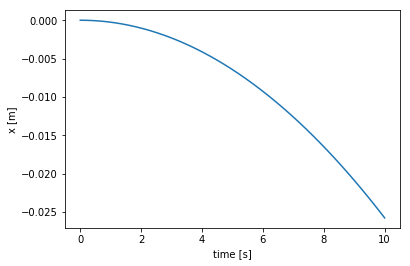

In [30]:
fig,ax = plt.subplots()
ax.plot(times,result[:,0])
ax.set_xlabel('time [s]')
ax.set_ylabel('x [m]')

In [31]:
p = O.pos_from(O0).express(earth_frame)
x0_ = p.dot(ship_frame.x)
x0_

(x(t)⋅sin(\psi(t)) + y(t)⋅cos(\psi(t)))⋅sin(\psi(t)) + (x(t)⋅cos(\psi(t)) - y(
t)⋅sin(\psi(t)))⋅cos(\psi(t))

In [32]:
y0_ = p.dot(ship_frame.y)
y0_

(x(t)⋅sin(\psi(t)) + y(t)⋅cos(\psi(t)))⋅cos(\psi(t)) - (x(t)⋅cos(\psi(t)) - y(
t)⋅sin(\psi(t)))⋅sin(\psi(t))

In [33]:
f_x0 = sym.lambdify((x,y,psi,t),x0_,"numpy")
f_y0 = sym.lambdify((x,y,psi,t),y0_,"numpy")


In [34]:
x0_sim = f_x0(result[:,0],result[:,1],result[:,2],times)

Text(0,0.5,'x0 [m]')

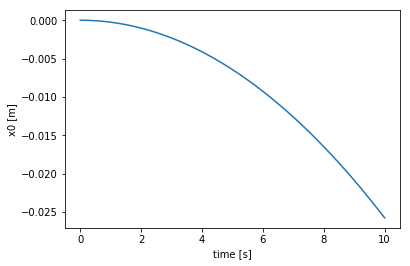

In [35]:
fig,ax = plt.subplots()
ax.plot(times,x0_sim)
ax.set_xlabel('time [s]')
ax.set_ylabel('x0 [m]')

In [36]:
y0_sim = f_y0(result[:,0],result[:,1],result[:,2],times)

Text(0,0.5,'y0 [m]')

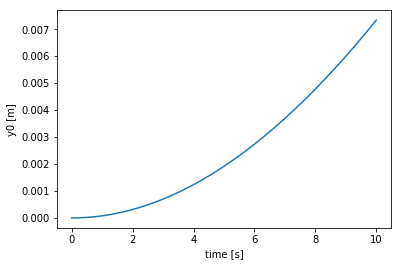

In [37]:
fig,ax = plt.subplots()
ax.plot(times,y0_sim)
ax.set_xlabel('time [s]')
ax.set_ylabel('y0 [m]')

Text(0,0.5,'x0 [m]')

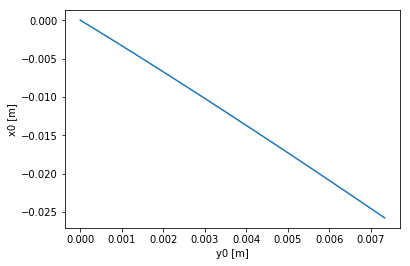

In [38]:
fig,ax = plt.subplots()
ax.plot(y0_sim,x0_sim)
ax.set_xlabel('y0 [m]')
ax.set_ylabel('x0 [m]')
